# Gradable Case 1 - AIRBNB

## Introduction
**Context.** 
For this case we are going to assume that you are interested on setting an Airbnb rental in [Santiago (Chile)](https://es.wikipedia.org/wiki/Santiago_de_Chile) and you want to make a model that can be able to predict the price of the rental in order to provide actionable recommendations for the setting of this new business

**Problem.**
In order to do that, you are requiered to build a lineal model of the price, and having as independent variables any variables from the provided information

## Packages Import

In [ ]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import cm
from pandas.plotting import scatter_matrix
import statsmodels.graphics.correlation
from statsmodels.stats import diagnostic

## Data Import

All data used on this case is pulished under a [Public Domain](http://creativecommons.org/publicdomain/zero/1.0/) license directly from [Airbnb](http://insideairbnb.com/get-the-data.html).

Data tables are usually accompanied by a data dictionary that explains the content of the information contained in one of the columns and some times provides some business context.
In the case of these data, the dictionary can be obtained at: [Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

In [ ]:
df_santiago = pd.read_csv('/work/indu5012_gradable_case_1/data/listings_AIRBNB_Santiago.csv')
df_santiago.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30950,https://www.airbnb.com/rooms/30950,20211225071122,2021-12-25,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...","Quiet and typical beatiful neighborghood, a lo...",https://a0.muscache.com/pictures/dedd0a9a-c58a...,132845,https://www.airbnb.com/users/show/132845,...,4.83,4.92,4.75,NaN,f,1,1,0,0,0.22
1,49392,https://www.airbnb.com/rooms/49392,20211225071122,2021-12-25,Share my Flat in Providencia,<b>The space</b><br />Departamento en el barri...,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,https://www.airbnb.com/users/show/224592,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
2,52811,https://www.airbnb.com/rooms/52811,20211225071122,2021-12-25,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Edificio ubicado en el acceso a la línea del M...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,https://www.airbnb.com/users/show/244792,...,4.59,4.64,4.36,NaN,t,3,3,0,0,0.34
3,53494,https://www.airbnb.com/rooms/53494,20211225071122,2021-12-25,depto centro ski el colorado chile,<b>The space</b><br />depto 2 dormitorios equi...,NaN,https://a0.muscache.com/pictures/310938/cae3f1...,249097,https://www.airbnb.com/users/show/249097,...,4.89,4.73,4.68,NaN,f,1,1,0,0,0.57
4,55303,https://www.airbnb.com/rooms/55303,20211225071122,2021-12-25,Plaza Lyon piso 3,"Apartamento de dos dormitorios, capacidad hast...",Se encuentra en el corazón de Providencia; caf...,https://a0.muscache.com/pictures/326169/2a8439...,261079,https://www.airbnb.com/users/show/261079,...,5.00,5.00,5.00,NaN,f,3,3,0,0,0.03


## Data Cleaning

Before we can start working on the data, the data needs to be cleaned. So, some columns that are not useful and some invalid data must be removed 

In [ ]:
df_santiago.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
df_santiago_useful =  df_santiago[['host_is_superhost','host_total_listings_count','neighbourhood_cleansed','property_type','room_type','accommodates','bedrooms','availability_365','number_of_reviews','latitude','price']]

In [ ]:
df_santiago_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9139 entries, 0 to 9138
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_is_superhost          9135 non-null   object 
 1   host_total_listings_count  9135 non-null   float64
 2   neighbourhood_cleansed     9139 non-null   object 
 3   property_type              9139 non-null   object 
 4   room_type                  9139 non-null   object 
 5   accommodates               9139 non-null   int64  
 6   bedrooms                   8768 non-null   float64
 7   availability_365           9139 non-null   int64  
 8   number_of_reviews          9139 non-null   int64  
 9   latitude                   9139 non-null   float64
 10  price                      9139 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 785.5+ KB


In [ ]:
df_santiago_useful.dropna(inplace=True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_santiago_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8764 entries, 0 to 9138
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_is_superhost          8764 non-null   object 
 1   host_total_listings_count  8764 non-null   float64
 2   neighbourhood_cleansed     8764 non-null   object 
 3   property_type              8764 non-null   object 
 4   room_type                  8764 non-null   object 
 5   accommodates               8764 non-null   int64  
 6   bedrooms                   8764 non-null   float64
 7   availability_365           8764 non-null   int64  
 8   number_of_reviews          8764 non-null   int64  
 9   latitude                   8764 non-null   float64
 10  price                      8764 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 821.6+ KB


In [ ]:
df_santiago_useful.columns

Index(['host_is_superhost', 'host_total_listings_count',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'availability_365', 'number_of_reviews', 'latitude',
       'price'],
      dtype='object')

In [ ]:
df_santiago_useful['price'] = df_santiago_useful['price'].str.replace(r'\D', '').map(int)
df_santiago_useful['price'].head(5)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    26000000
1     4565200
2     4651300
3    14999900
4     7000000
Name: price, dtype: int64

## Exploratory Data Analysis

In order to deal with possible outliers, an exploratory data analysis is run. 

<AxesSubplot:xlabel='host_is_superhost', ylabel='Count'>

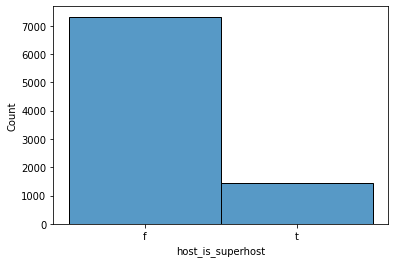

In [ ]:
sns.histplot(df_santiago_useful['host_is_superhost'])

(8148, 11)


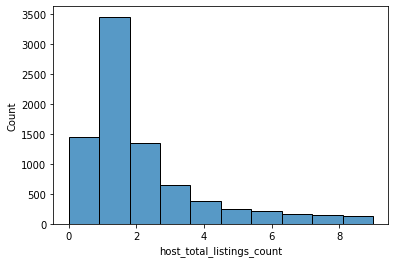

In [ ]:
df_santiago_useful = df_santiago_useful[df_santiago_useful['host_total_listings_count']<10]
sns.histplot(df_santiago_useful['host_total_listings_count'], bins=10)
print(df_santiago_useful.shape)

<AxesSubplot:xlabel='Count', ylabel='neighbourhood_cleansed'>

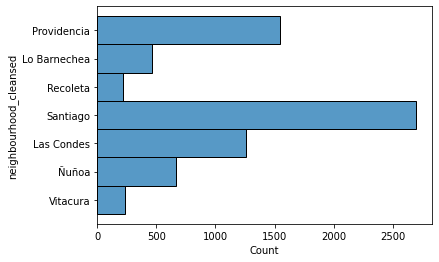

In [ ]:
remove_list = ['La Florida','La Reina', 'Independencia', 'San Miguel', 'Maipú', 'Peñalolén', 'Macul','Pedro Aguirre Cerda', 'Pudahuel', 'Quinta Normal','Estación Central', 'San Joaquín', 'El Bosque', 'Lo Espejo','La Cisterna', 'Quilicura', 'Lo Prado', 'Huechuraba', 'Conchalí','Renca', 'Cerrillos', 'La Granja', 'Cerro Navia']
df_santiago_useful = df_santiago_useful[~df_santiago_useful['neighbourhood_cleansed'].isin(remove_list)]

sns.histplot(data = df_santiago_useful,y = 'neighbourhood_cleansed')

<AxesSubplot:xlabel='Count', ylabel='property_type'>

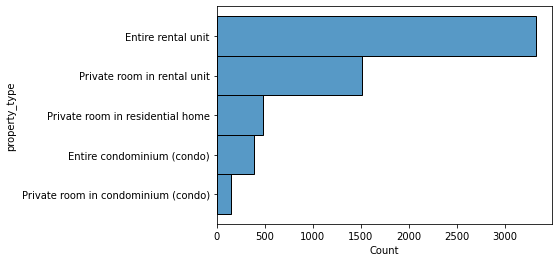

In [ ]:
remove_list = ['Entire chalet', 'Private room in nature lodge',
       'Private room in guesthouse', 'Shared room in condominium (condo)',
       'Entire guest suite', 'Shared room in guesthouse',
       'Private room in bungalow', 'Room in boutique hotel',
       'Room in hostel', 'Room in aparthotel', 'Private room in cabin',
       'Entire cottage', 'Entire bungalow', 'Shared room',
       'Entire townhouse', 'Entire hostel', 'Private room in floor',
       'Earth house', 'Shared room in serviced apartment',
       'Private room in tiny house', 'Private room in dorm',
       'Private room in earth house', 'Private room in chalet',
       'Shared room in aparthotel', 'Shared room in boutique hotel',
       'Bus', 'Shared room in earth house', 'Private room in camper/rv',
       'Camper/RV', 'Shared room in tiny house', 'Dome house',
       'Private room in pension', 'Private room in barn', 'Treehouse',
       'Entire home/apt', 'Farm stay', 'Castle',
       'Shared room in casa particular', 'Private room in vacation home',
       'Private room in villa',        'Casa particular', 'Private room', 'Entire loft',
       'Entire residential home', 'Room in serviced apartment',
       'Entire serviced apartment', 'Private room in casa particular',
       'Private room in hostel', 'Room in bed and breakfast',
       'Private room in guest suite', 'Shared room in hostel',
       'Shared room in loft', 'Entire place', 'Tiny house',
       'Shared room in bed and breakfast', 'Entire cabin',
       'Private room in serviced apartment', 'Entire vacation home',
       'Entire guesthouse', 'Room in hotel', 'Private room in farm stay',
       'Private room in loft', 'Private room in townhouse','Shared room in residential home', 'Shared room in rental unit',
       'Entire villa', 'Private room in bed and breakfast']
df_santiago_useful = df_santiago_useful[~df_santiago_useful['property_type'].isin(remove_list)]

sns.histplot(data = df_santiago_useful, y = 'property_type')

(5659, 11)


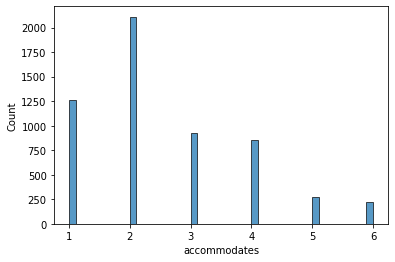

In [ ]:
df_santiago_useful = df_santiago_useful[df_santiago_useful['accommodates']<7]

sns.histplot(df_santiago_useful['accommodates'])
print(df_santiago_useful.shape)

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

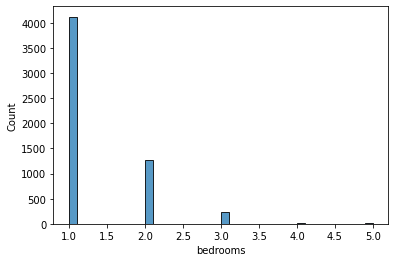

In [ ]:
df_santiago_useful = df_santiago_useful[df_santiago_useful['bedrooms']<6]

sns.histplot(df_santiago_useful['bedrooms'])

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

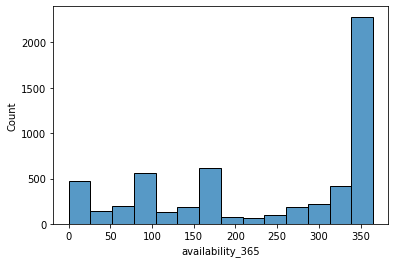

In [ ]:
sns.histplot(df_santiago_useful['availability_365'])

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

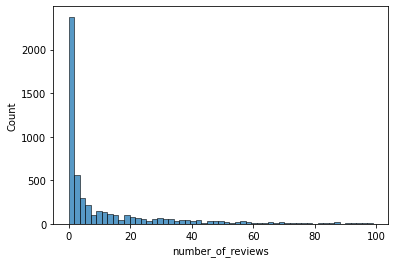

In [ ]:
df_santiago_useful = df_santiago_useful[df_santiago_useful['number_of_reviews']<100]

sns.histplot(df_santiago_useful['number_of_reviews'])

<AxesSubplot:xlabel='price', ylabel='Count'>

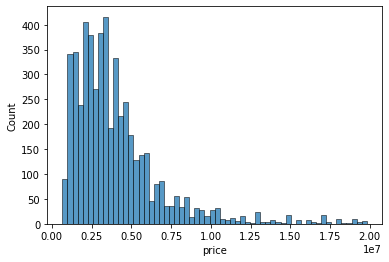

In [ ]:
df_santiago_useful = df_santiago_useful[df_santiago_useful['price']<20000000]

sns.histplot(df_santiago_useful['price'])

<AxesSubplot:xlabel='latitude', ylabel='Count'>

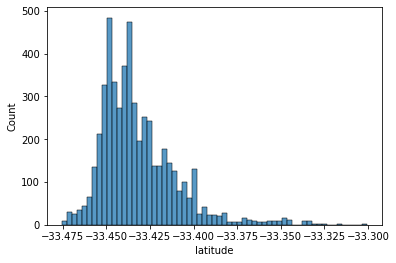

In [ ]:
sns.histplot(df_santiago_useful['latitude'])

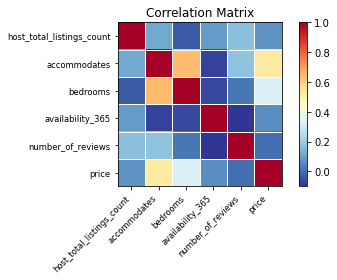

In [ ]:
df_santiago_useful_num = df_santiago_useful[['host_total_listings_count','accommodates','bedrooms','availability_365','number_of_reviews','price']]
corr_mat = df_santiago_useful_num.corr()
statsmodels.graphics.correlation.plot_corr(corr_mat,xnames=df_santiago_useful_num.columns, ynames=df_santiago_useful_num.columns);

## Excercise 1

Run a lineal model for all the numerical variables of the model. What can you conclude about it? What variables are significant on the model? What can you tell about the residuals of the model?

**Answer**

## Excercise 2

Add the categorical variables to the previous model. What can you conclude about it? What variables are significant on the model? What can you tell about the residuals of the model?

**Answer**

## Excercise 3

Check the model for Heteroskedasticity. What can you tell from the results of the test?

**Answer**

## Excercise 4

Check the studentized residuals in order to find any not-so-obvious outliers. What can you conclude about it?

**Answer**

## Excercise 5

Check the model for Multicollinearity. What can you conclude about it?

**Answer**

## Excercise 6

What variable transformation would you think that would help to improve the model? Run the new models and compare the results with previous models.

**Answer**

## Excercise 7

What is the best model you can come up with? Explain your reasoning on why it you cose it and why it could be a good model

**Answer**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>